In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [141]:
class SurvivalPredictor:
    def __init__(self, filepath):
        self.survivalset = pd.read_csv(filepath)
        self.preprocess()
        self.m = self.X.shape[0]
        self.n = self.X.shape[1]
        self.w = np.zeros(self.n)
        self.b = 0
        self.cost_history = [] 
        self.split_index = int(0.85 * self.m)
        self.split_data()
        

    def preprocess(self):
        self.survivalset = pd.get_dummies(self.survivalset, columns=['Sex'])
        self.survivalset = self.survivalset.replace({True: 1, False: 0})
        self.numericdata = self.survivalset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'Embarked'])
        self.correlation_matrix = self.numericdata.corr()
        self.X = self.survivalset[list(self.survivalset.columns.difference(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'Embarked']))].values
        self.Y = self.survivalset['Survived'].values
        self.X = (self.X - self.X.mean(axis=0)) / self.X.std(axis=0)
        
        
        
    def split_data(self):
        self.X_train, self.X_test = self.X[:self.split_index], self.X[self.split_index:]
        self.Y_train, self.Y_test = self.Y[:self.split_index], self.Y[self.split_index:]
        

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    
    def compute_cost(self):
        cost = 0
        for i in range(self.split_index):
            prediction = self.sigmoid(np.dot(self.X_train[i], self.w) + self.b)
            cost += (-1 / self.m) * (self.Y_train[i] * np.log(prediction) + (1 - self.Y_train[i]) * np.log(1 - prediction))
        return cost

    
    def gradient_descent(self, alpha, iterations):
        for _ in range(iterations):
            dw = np.zeros(self.n)
            db = 0
            for i in range(self.split_index): 
                prediction = self.sigmoid(np.dot(self.X_train[i], self.w) + self.b)
                error = prediction - self.Y_train[i]
                dw += (1 / self.m) * error * self.X_train[i] 
                db += (1 / self.m) * error
            self.w -= alpha * dw
            self.b -= alpha * db
            cost = self.compute_cost()
            self.cost_history.append(cost)

    
    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.w) + self.b)
        return (predictions >= 0.55).astype(int)

    
    def f1_score(self):
        predictions = self.predict(self.X_test)
        TP, FP, FN = 0, 0, 0
        for i in range(self.m - self.split_index):
            if predictions[i] == 1 and self.Y_test[i] == 1:
                TP += 1
            elif predictions[i] == 1 and self.Y_test[i] == 0:
                FP += 1
            elif predictions[i] == 0 and self.Y_test[i] == 1:
                FN += 1
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return f1
            

    
    def train(self):
        self.gradient_descent(0.05, 500)

    
    def display_correlation_matrix(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
        plt.title("Correlation Matrix Heatmap")
        plt.show()

    
    def confusion_matrix(self):
        predictions = self.predict(self.X_test)
        cm = confusion_matrix(self.Y_test, predictions)
        return cm

    
    def plot_confusion_matrix(self):
        cm = self.confusion_matrix()
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()






C:\Users\pkmna\AppData\Local\Temp\ipykernel_14680\4252625950.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.survivalset = self.survivalset.replace({True: 1, False: 0})


F1 score: 0.71%


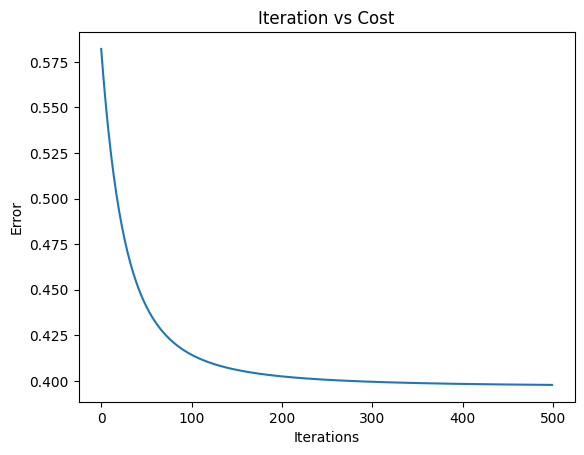

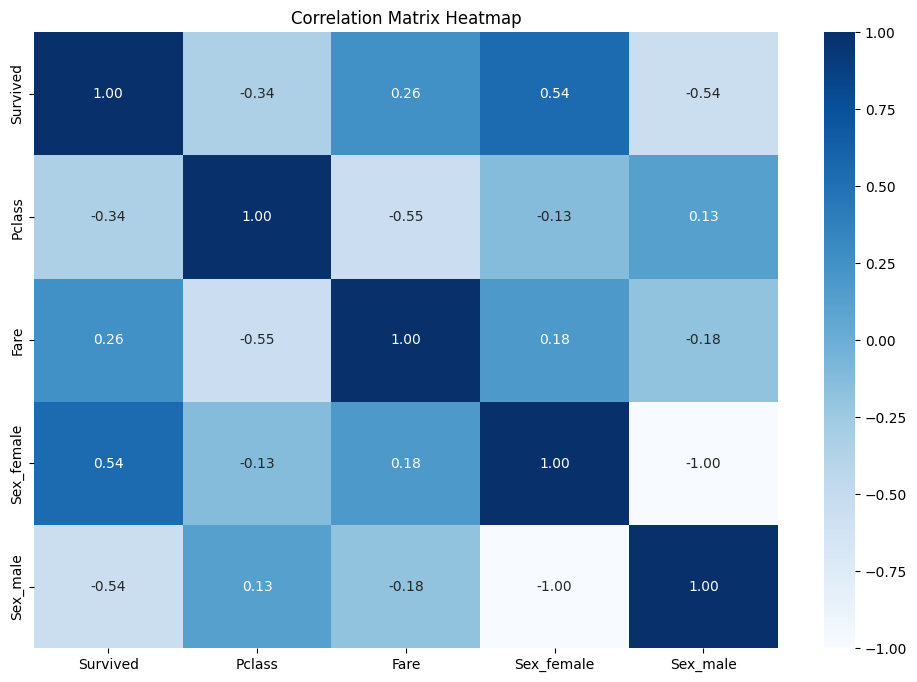

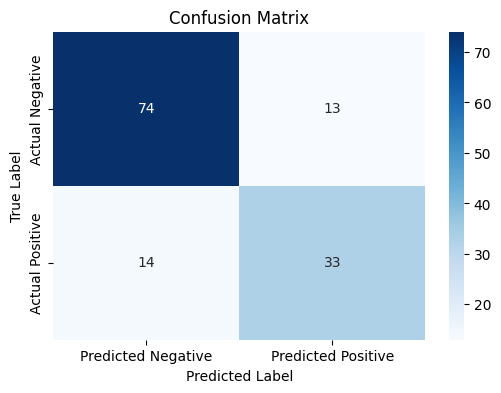

In [142]:
if __name__ == "__main__":
    predictor = SurvivalPredictor(r"C:\Users\pkmna\Downloads\titanic.csv")
    predictor.train()
    f1score=predictor.f1_score()
    print("F1 score: %.2f%%" % f1score)
    plt.plot(predictor.cost_history)
    plt.title("Iteration vs Cost")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()
    predictor.display_correlation_matrix()
    predictor.plot_confusion_matrix()